In [ ]:
!pip install yellowbrick

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import  linkage, dendrogram, fcluster

from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")

In [46]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/직무능력평가.csv", encoding='euc-kr')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [47]:
scaler=StandardScaler()
df_raw_scaled= scaler.fit_transform(df_raw)
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [48]:
df_raw_y=df_raw_scaled[:,0]
df_raw_x=df_raw_scaled[:,1::]

In [49]:
Z_ward= linkage(df_raw_x, method="ward", metric="euclidean")
Z_average= linkage(df_raw_x, method="average", metric="euclidean")

In [50]:
Z_ward

array([[14.        , 26.        ,  0.52156235,  2.        ],
       [ 3.        , 27.        ,  0.65700712,  2.        ],
       [ 9.        , 22.        ,  0.84734214,  2.        ],
       [16.        , 28.        ,  1.13863458,  2.        ],
       [ 6.        ,  7.        ,  1.17063718,  2.        ],
       [ 1.        , 21.        ,  1.22298201,  2.        ],
       [11.        , 32.        ,  1.31728974,  3.        ],
       [ 2.        ,  4.        ,  1.33423955,  2.        ],
       [24.        , 36.        ,  1.47235046,  4.        ],
       [30.        , 37.        ,  1.65014418,  4.        ],
       [18.        , 35.        ,  1.78970024,  3.        ],
       [29.        , 34.        ,  1.8539993 ,  3.        ],
       [10.        , 12.        ,  1.88477465,  2.        ],
       [31.        , 38.        ,  1.94570646,  6.        ],
       [25.        , 33.        ,  2.11914806,  3.        ],
       [ 5.        , 42.        ,  2.16582648,  3.        ],
       [17.        , 19.

Text(0, 0.5, 'Distance')

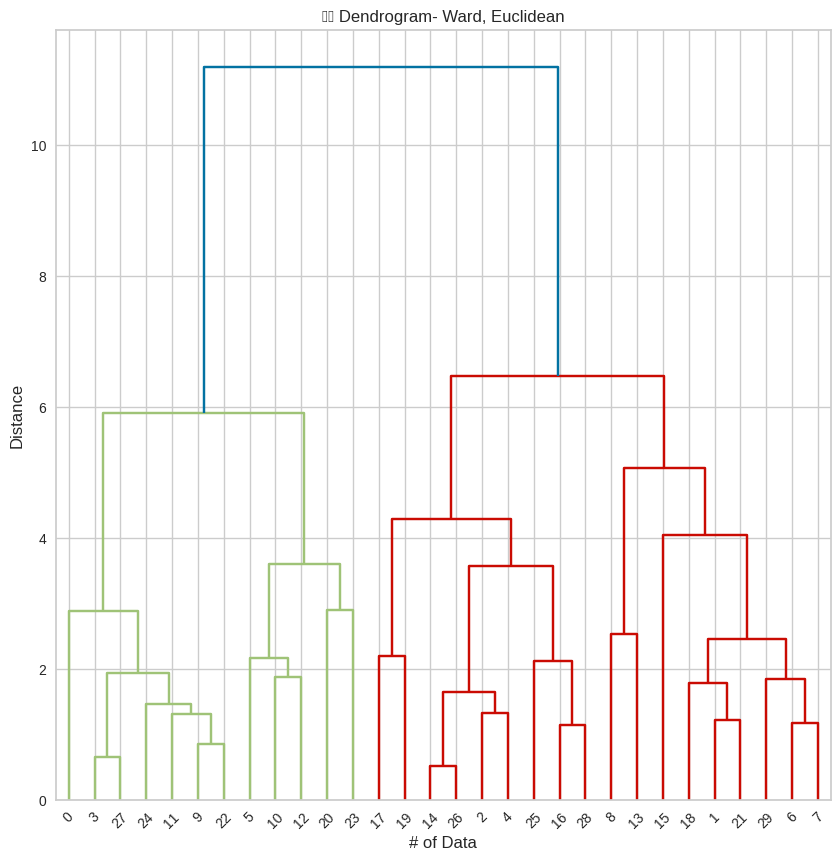

In [51]:
plt.figure(figsize=(10,10))
ax= plt.subplot(111)
dendrogram(Z_ward, leaf_font_size=10, orientation="top")
plt.title("군집 Dendrogram- Ward, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

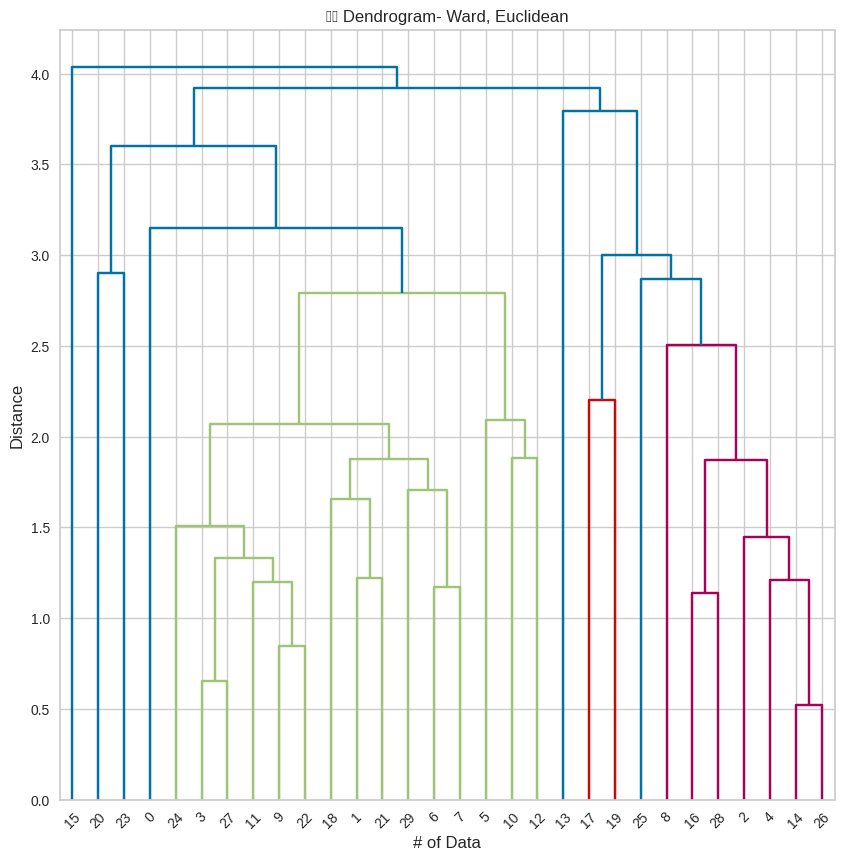

In [52]:
plt.figure(figsize=(10,10))
ax= plt.subplot(111)
dendrogram(Z_average, leaf_font_size=10, orientation="top")
plt.title("군집 Dendrogram- Ward, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

In [53]:
cluster_H=fcluster(Z=Z_ward,  t=5, criterion="distance")
df_raw["cluster_H"]=cluster_H
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [54]:
df_summary_H= df_raw.groupby("cluster_H").agg(['min','mean','max'])
level0= df_summary_H.columns.get_level_values(0)
level1= df_summary_H.columns.get_level_values(1)

df_summary_H.columns= level0+"_"+level1
df_summary_H.reset_index(inplace=True)
df_summary_H.round(3)

,cluster_H,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


<Axes: title={'center': 'EVAL'}, xlabel='cluster_H'>

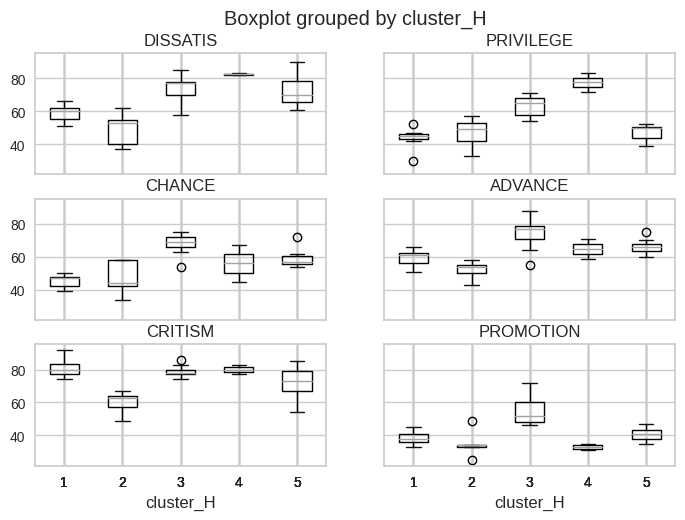

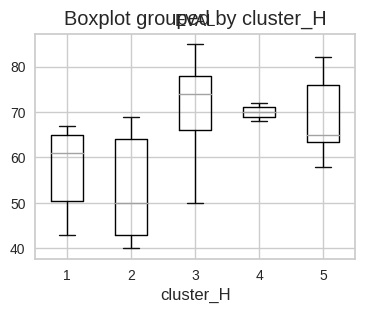

In [55]:
df_raw.boxplot(column=["DISSATIS","PRIVILEGE","CHANCE","ADVANCE","CRITISM","PROMOTION"], by="cluster_H")
df_raw.boxplot(column=["EVAL"],by="cluster_H", figsize=(4,3))

In [56]:
n_iter_cluster=15
cluster_range=[i+1 for i in range(n_iter_cluster)]
clus_error=[]
for v_n_clus in cluster_range:
    clus=KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    clus_error.append(clus.inertia_)
df_error=pd.DataFrame({"NumberofCluster":cluster_range,"ERROR":clus_error})
df_error.round(3)

,NumberofCluster,ERROR
0,1,180.000
1,2,114.083
2,3,93.981
3,4,80.815
4,5,67.822
5,6,58.136
6,7,50.781
7,8,41.865
8,9,36.985
9,10,32.772


Text(0, 0.5, 'Sum of Square')

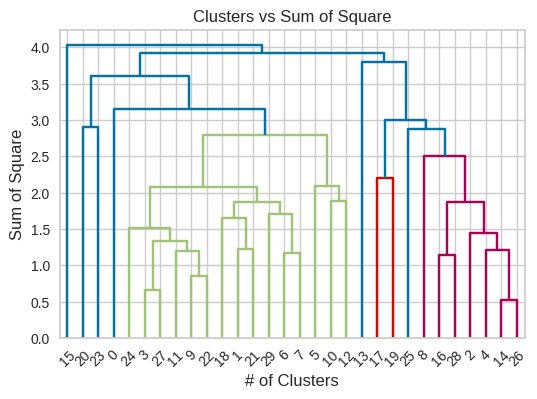

In [57]:
plt.figure(figsize=(6,4))
plt.plot(df_error["NumberofCluster"],df_error["ERROR"])
dendrogram(Z_average, leaf_font_size=10, orientation="top")
plt.title("Clusters vs Sum of Square")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Square")

In [58]:
clus=KMeans(5)
clus.fit(df_raw_x)
cluster_KM=[i+1 for i in clus.labels_]
df_raw["cluster_KM"]=cluster_KM
df_raw.head(10)

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H,cluster_KM
0,43,51,30,39,61,92,45,1,1
1,63,64,51,54,63,73,47,5,5
2,71,70,68,69,76,86,48,3,2
3,61,63,45,47,54,84,35,1,1
4,81,78,56,66,71,83,47,3,2
5,43,55,49,44,54,49,34,2,4
6,58,67,42,56,66,68,35,5,5
7,71,75,50,55,70,66,41,5,5
8,72,82,72,67,71,83,31,4,2
9,67,61,45,47,62,80,41,1,1


In [59]:
df_summary_KM= df_raw.drop("cluster_H", axis=1, inplace=False).groupby("cluster_KM").agg(["min","mean","max"])
level0= df_summary_KM.columns.get_level_values(0)
level1= df_summary_KM.columns.get_level_values(1)

df_summary_KM.columns= level0+"_"+level1
df_summary_KM.reset_index(inplace=True)
df_summary_KM.round(3)

,cluster_KM,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,50,71.273,85,58,74.273,85,46,62.545,72,...,75,55,74.091,88,74,79.909,86,31,51.727,72
2,3,68,68.000,68,83,83.000,83,83,83.000,83,...,45,59,59.000,59,77,77.000,77,35,35.000,35
3,4,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
4,5,58,69.833,82,61,73.167,90,39,47.333,52,...,72,60,64.833,70,54,69.833,80,35,39.833,47


<Axes: title={'center': 'EVAL'}, xlabel='cluster_KM'>

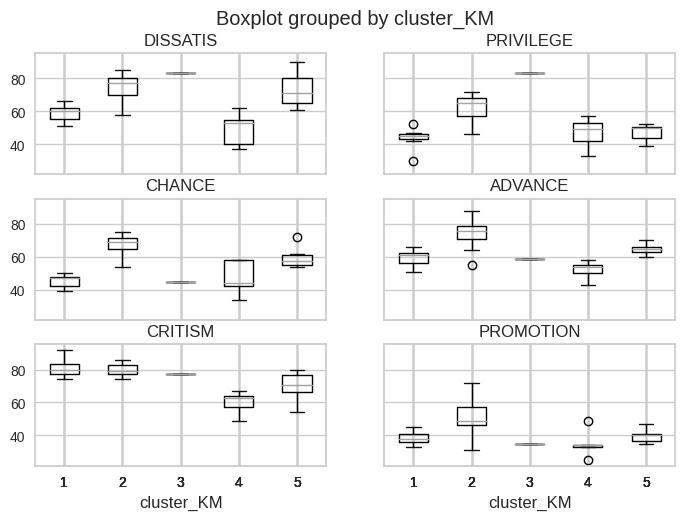

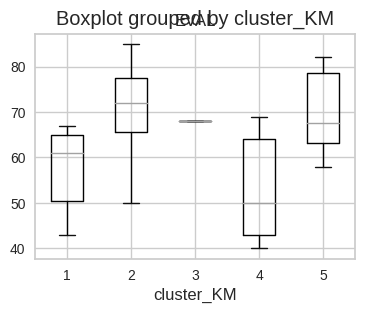

In [60]:
df_raw.boxplot(column=["DISSATIS","PRIVILEGE","CHANCE","ADVANCE","CRITISM","PROMOTION"], by="cluster_KM")
df_raw.boxplot(column=["EVAL"],by="cluster_KM", figsize=(4,3))

In [61]:
cls_h= AgglomerativeClustering(n_clusters=3).fit_predict(df_raw_x)
sil_score= silhouette_score(df_raw_x,cls_h,metric="euclidean")
print("계층형(군집수=3) 실루엣 계수=",format(round(sil_score,3)))

cls_h= AgglomerativeClustering(n_clusters=4).fit_predict(df_raw_x)
sil_score= silhouette_score(df_raw_x,cls_h,metric="euclidean")
print("계층형(군집수=4) 실루엣 계수=",format(round(sil_score,3)))

계층형(군집수=3) 실루엣 계수= 0.187
계층형(군집수=4) 실루엣 계수= 0.198


In [62]:
cls_h= KMeans(3).fit_predict(df_raw_x)
sil_score= silhouette_score(df_raw_x,cls_h)
print("k-평균(군집 수=3) 실루엣 계수=",format(round(sil_score,3)))

cls_h= KMeans(4).fit_predict(df_raw_x)
sil_score= silhouette_score(df_raw_x,cls_h)
print("k-평균(군집 수=4) 실루엣 계수=",format(round(sil_score,3)))

k-평균(군집 수=3) 실루엣 계수= 0.242
k-평균(군집 수=4) 실루엣 계수= 0.265


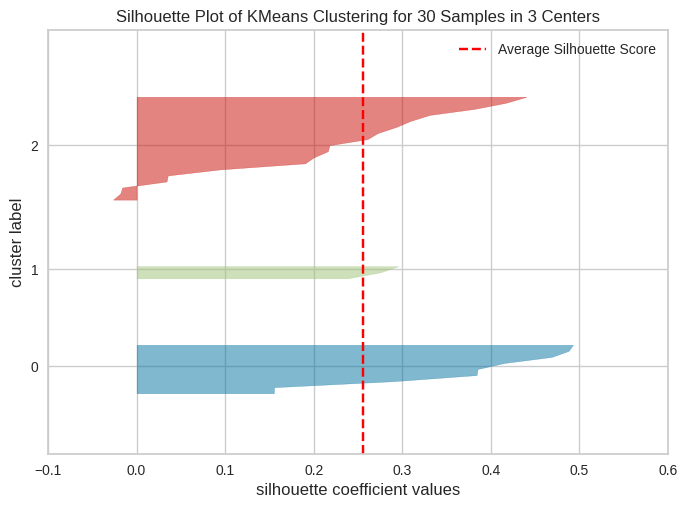

실루엣 계수= 0.2557


In [63]:
clus=KMeans(3)
graph_sil=SilhouetteVisualizer(clus, colors="yellowbrick")
graph_sil.fit(df_raw_x)
graph_sil.show()
print("실루엣 계수=",format(round(graph_sil.silhouette_score_,4)))

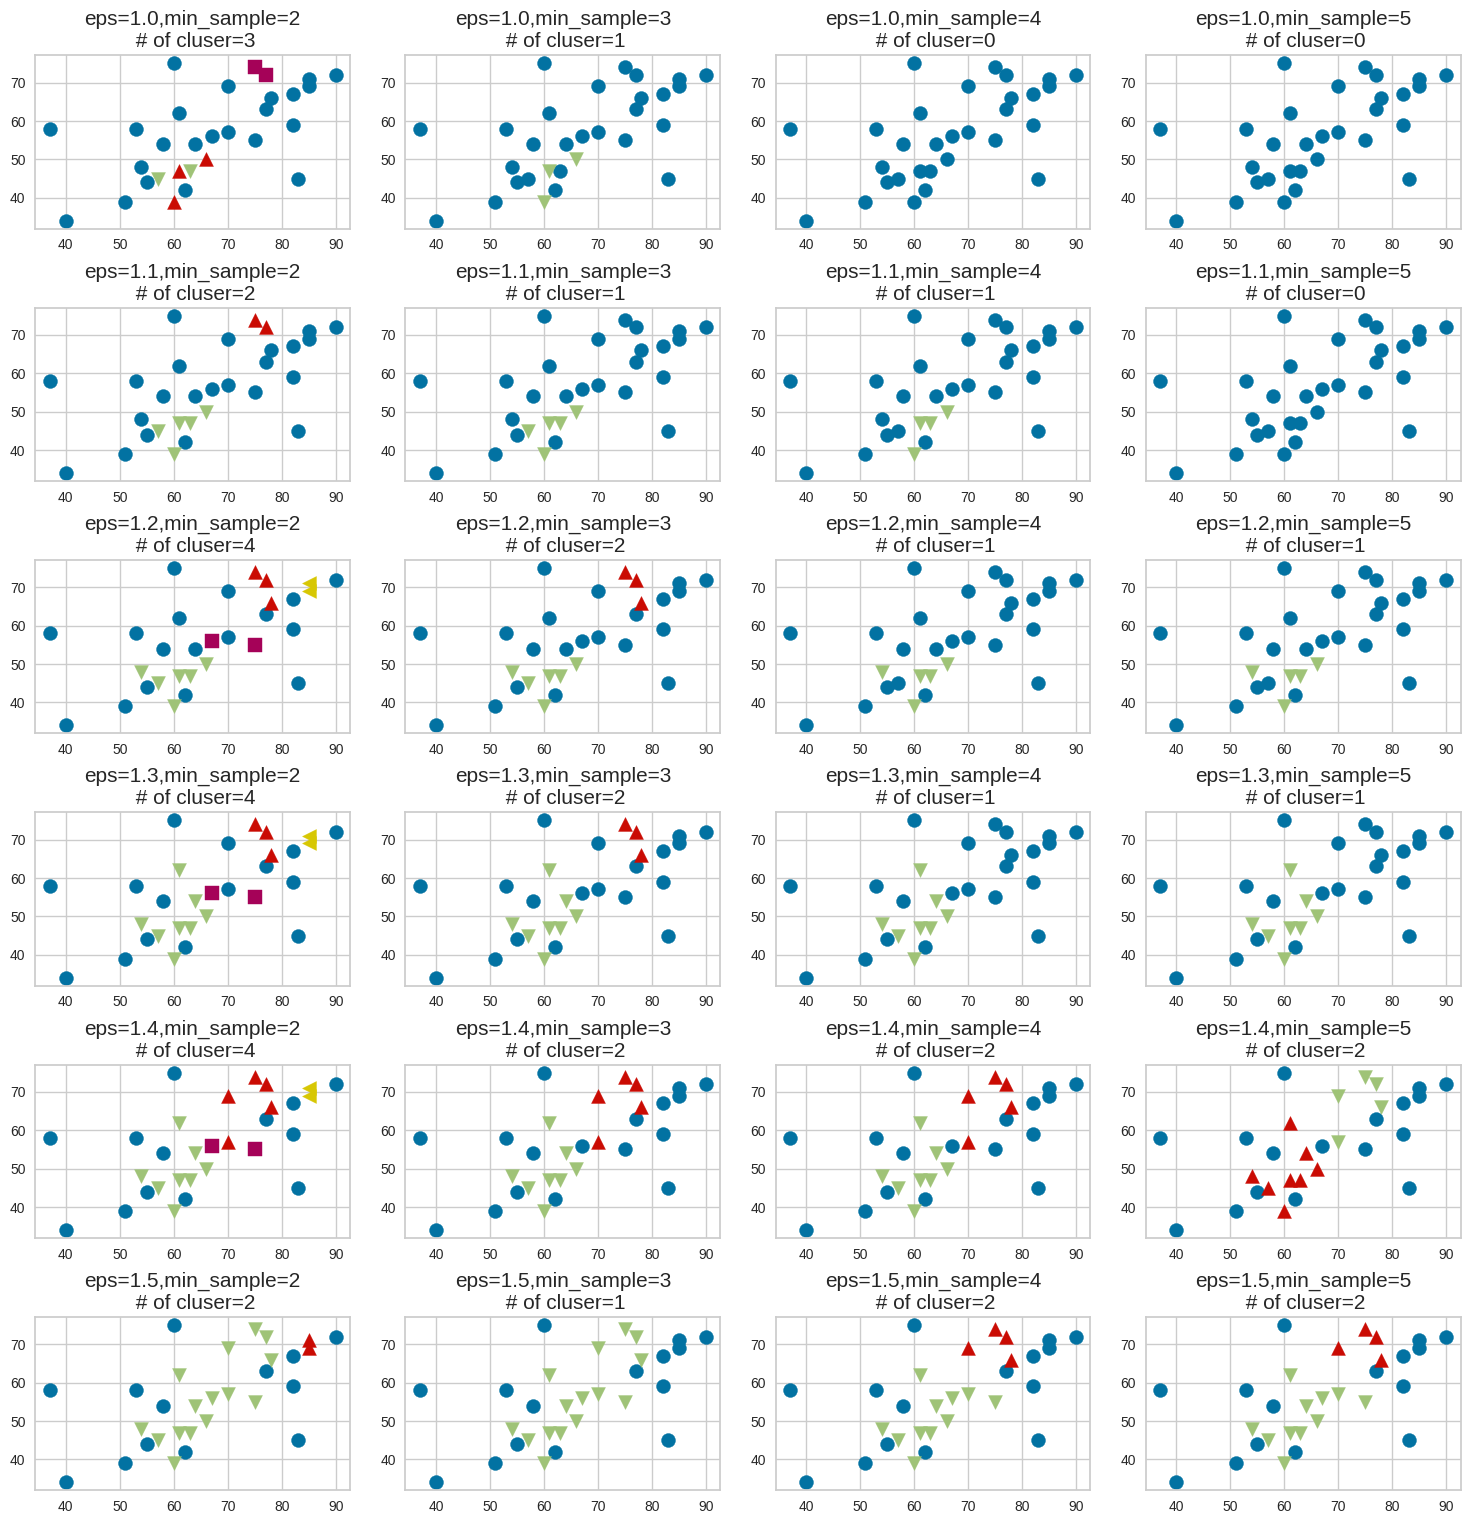

In [64]:
X=df_raw["DISSATIS"]
Y=df_raw["CHANCE"]

markers=["o","v","^","s","<",">","p","D"]
para_eps=[k/10 for k in range(10,16,1)]
para_min_sample=[2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize=(15,15))
fig.tight_layout(w_pad=1, h_pad=3)

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan=DBSCAN(min_samples=min_sample, eps=eps)
        clusters = dbscan.fit_predict(df_raw_x)
        clusters= clusters+1
        for (n_clus,clus) in enumerate(range(min(clusters),max(clusters)+1,1)):
            axes[i,j].scatter(X[clusters==clus], Y[clusters==clus], marker=markers[n_clus],s=100)
            axes[i,j].set_title("eps="+str(eps)+",min_sample="+str(min_sample)+"\n # of cluser="+str(max(clusters)), fontsize=15)

In [65]:
dbscan=DBSCAN(eps=1.4, min_samples=2).fit(df_raw_x)

cluster_DB= dbscan.labels_

for (i,val) in enumerate(cluster_DB):
    if val <0:
        cluster_DB[i]=0
    else:
        cluster_DB[i]=cluster_DB[i]+1
df_raw["cluster_DB"]= cluster_DB
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H,cluster_KM,cluster_DB
0,43,51,30,39,61,92,45,1,1,0
1,63,64,51,54,63,73,47,5,5,1
2,71,70,68,69,76,86,48,3,2,2
3,61,63,45,47,54,84,35,1,1,1
4,81,78,56,66,71,83,47,3,2,2


In [66]:
df_summary_DB= df_raw.drop(["cluster_H","cluster_H"], axis=1, inplace=False).groupby("cluster_DB").agg(["min","mean","max"])
level0= df_summary_DB.columns.get_level_values(0)
level1= df_summary_DB.columns.get_level_values(1)

df_summary_DB.columns= level0+"_"+level1
df_summary_DB.reset_index(inplace=True)
df_summary_DB.round(3)

,cluster_DB,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max,cluster_KM_min,cluster_KM_mean,cluster_KM_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,88,49,70.615,92,25,41.923,72,1,3.231,5
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,66,73,78.625,84,33,39.125,47,1,2.000,5
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,80,77,81.800,86,46,47.200,49,2,2.000,2
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,70,66,67.000,68,35,38.000,41,5,5.000,5
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,79,74,76.500,79,55,59.000,63,2,2.000,2


# 군집분석 실습

In [81]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/IRIS.csv", encoding='euc-kr')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [93]:
df_raw_y = df_raw.iloc[:, 4]
df_raw_y = pd.DataFrame(df_raw_y)
df_raw_y

,SPECIES
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [96]:
df_raw_x= df_raw.drop(['SPECIES'],axis=1) # New_Price 변수는 결측치가 너무 많아 제거하였습니다.
df_raw_x

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [97]:
scaler=StandardScaler()
df_raw_scaled= scaler.fit_transform(df_raw_x)
df_raw_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [98]:
Z_ward= linkage(df_raw_x, method="ward", metric="euclidean")
Z_average= linkage(df_raw_x, method="average", metric="euclidean")

In [99]:
Z_ward

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

Text(0, 0.5, 'Distance')

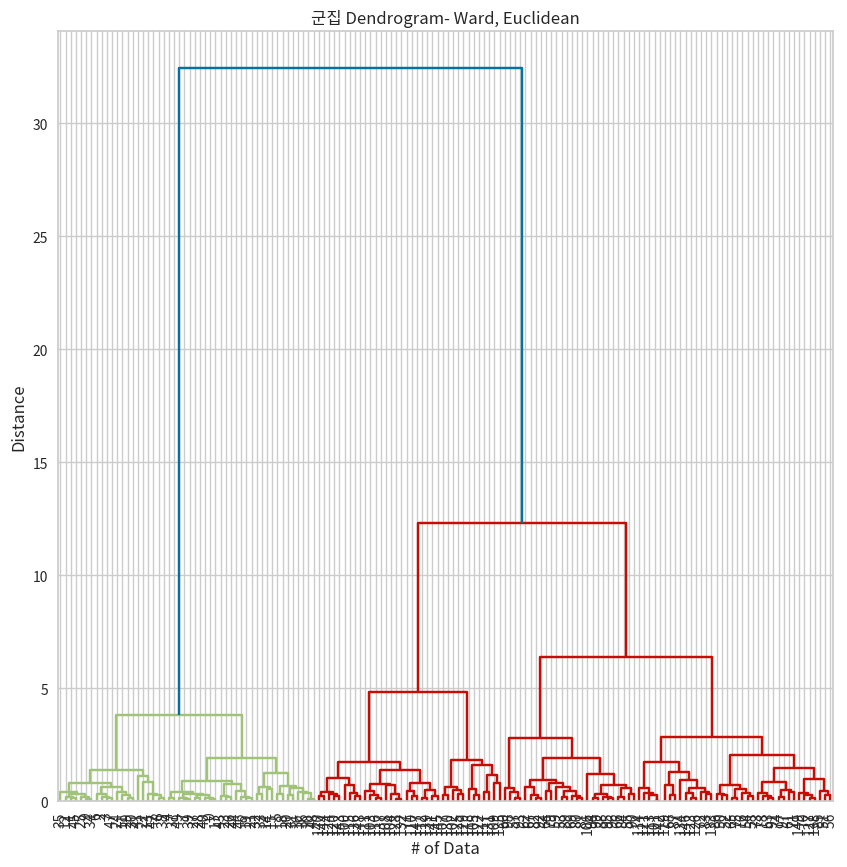

In [100]:
plt.figure(figsize=(10,10))
ax= plt.subplot(111)
dendrogram(Z_ward, leaf_font_size=10, orientation="top")
plt.title("군집 Dendrogram- Ward, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

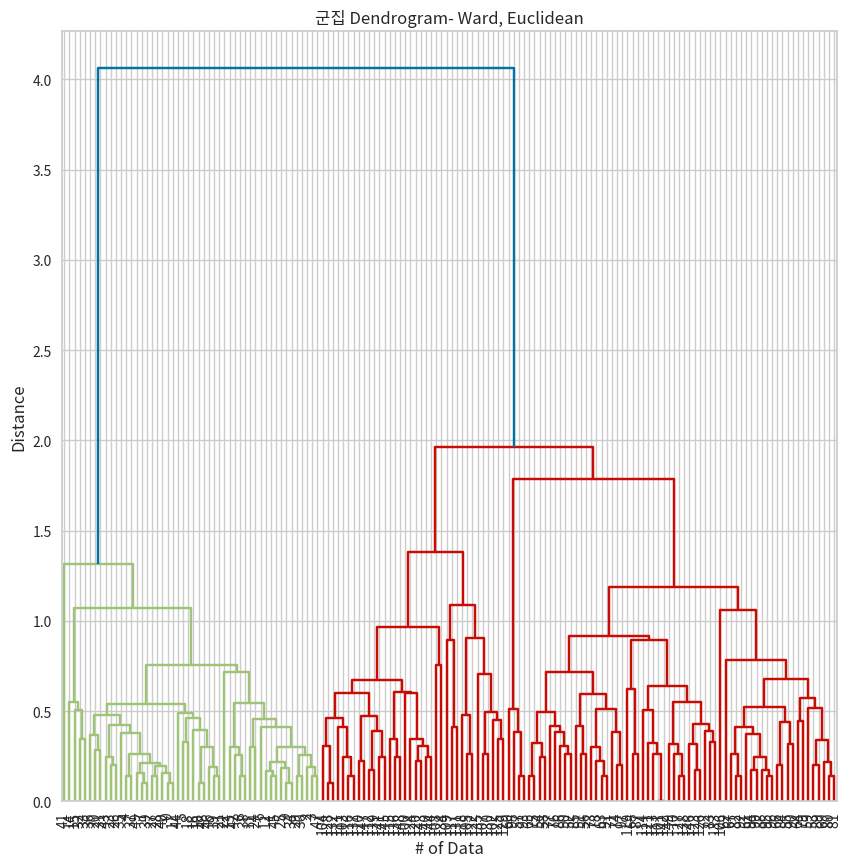

In [101]:
plt.figure(figsize=(10,10))
ax= plt.subplot(111)
dendrogram(Z_average, leaf_font_size=10, orientation="top")
plt.title("군집 Dendrogram- Ward, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

In [102]:
cluster_H=fcluster(Z=Z_ward,  t=5, criterion="distance")
df_raw["cluster_H"]=cluster_H
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,cluster_H
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [103]:
df_summary_H= df_raw.groupby("cluster_H").agg(['min','mean','max'])
level0= df_summary_H.columns.get_level_values(0)
level1= df_summary_H.columns.get_level_values(1)

df_summary_H.columns= level0+"_"+level1
df_summary_H.reset_index(inplace=True)
df_summary_H.round(3)

,cluster_H,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,4.3,5.006,5.8,2.3,3.428,4.4,1.0,1.462,1.9,0.1,0.246,0.6
1,2,6.2,6.869,7.9,2.5,3.086,3.8,5.0,5.769,6.9,1.6,2.106,2.5
2,3,4.9,5.496,6.0,2.0,2.615,3.0,3.0,3.950,4.5,1.0,1.215,1.7
3,4,5.6,6.211,7.0,2.2,2.845,3.4,4.0,4.742,5.6,1.2,1.584,2.4


KeyError: 'Column not found: DISSATIS'

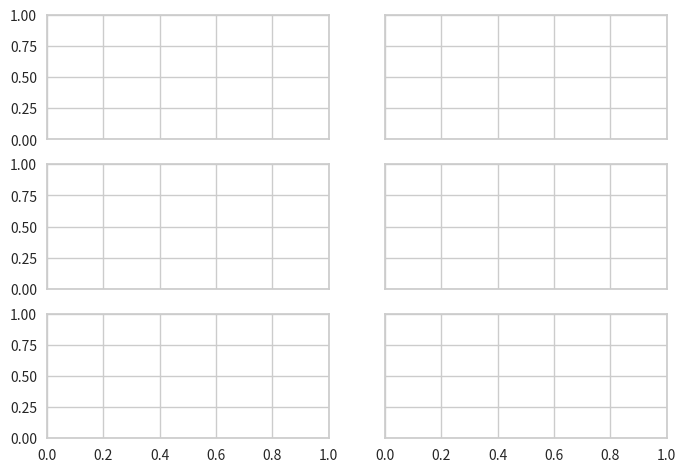

In [104]:
df_raw.boxplot(column=["SEPAL_LENGTH","SEPAL_WIDTH","PETAL_LENGTH","PETAL_WIDTH"], by="cluster_H")
df_raw.boxplot(column=["EVAL"],by="cluster_H", figsize=(4,3))

In [56]:
n_iter_cluster=15
cluster_range=[i+1 for i in range(n_iter_cluster)]
clus_error=[]
for v_n_clus in cluster_range:
    clus=KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    clus_error.append(clus.inertia_)
df_error=pd.DataFrame({"NumberofCluster":cluster_range,"ERROR":clus_error})
df_error.round(3)

,NumberofCluster,ERROR
0,1,180.000
1,2,114.083
2,3,93.981
3,4,80.815
4,5,67.822
5,6,58.136
6,7,50.781
7,8,41.865
8,9,36.985
9,10,32.772


Text(0, 0.5, 'Sum of Square')

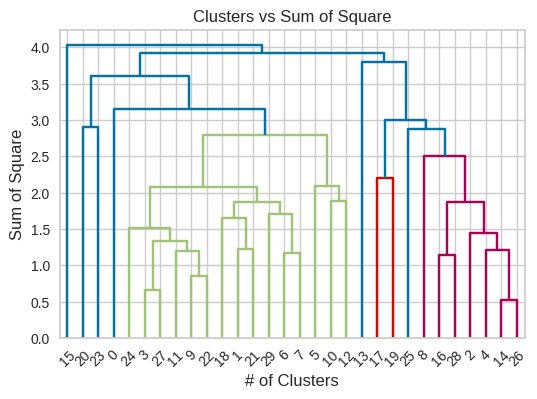

In [57]:
plt.figure(figsize=(6,4))
plt.plot(df_error["NumberofCluster"],df_error["ERROR"])
dendrogram(Z_average, leaf_font_size=10, orientation="top")
plt.title("Clusters vs Sum of Square")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Square")

In [58]:
clus=KMeans(5)
clus.fit(df_raw_x)
cluster_KM=[i+1 for i in clus.labels_]
df_raw["cluster_KM"]=cluster_KM
df_raw.head(10)

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H,cluster_KM
0,43,51,30,39,61,92,45,1,1
1,63,64,51,54,63,73,47,5,5
2,71,70,68,69,76,86,48,3,2
3,61,63,45,47,54,84,35,1,1
4,81,78,56,66,71,83,47,3,2
5,43,55,49,44,54,49,34,2,4
6,58,67,42,56,66,68,35,5,5
7,71,75,50,55,70,66,41,5,5
8,72,82,72,67,71,83,31,4,2
9,67,61,45,47,62,80,41,1,1


In [59]:
df_summary_KM= df_raw.drop("cluster_H", axis=1, inplace=False).groupby("cluster_KM").agg(["min","mean","max"])
level0= df_summary_KM.columns.get_level_values(0)
level1= df_summary_KM.columns.get_level_values(1)

df_summary_KM.columns= level0+"_"+level1
df_summary_KM.reset_index(inplace=True)
df_summary_KM.round(3)

,cluster_KM,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,50,71.273,85,58,74.273,85,46,62.545,72,...,75,55,74.091,88,74,79.909,86,31,51.727,72
2,3,68,68.000,68,83,83.000,83,83,83.000,83,...,45,59,59.000,59,77,77.000,77,35,35.000,35
3,4,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
4,5,58,69.833,82,61,73.167,90,39,47.333,52,...,72,60,64.833,70,54,69.833,80,35,39.833,47


<Axes: title={'center': 'EVAL'}, xlabel='cluster_KM'>

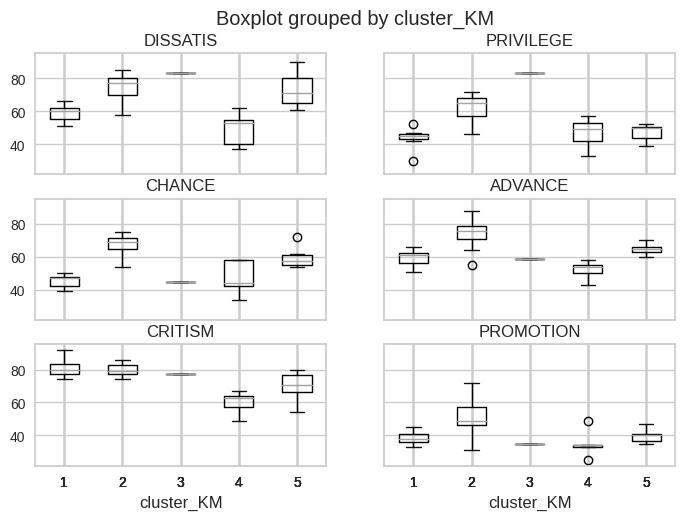

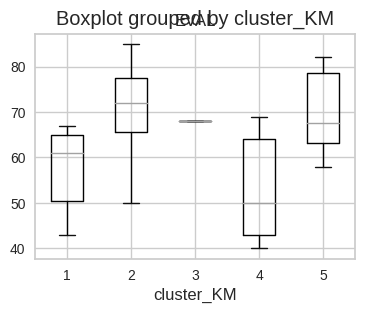

In [60]:
df_raw.boxplot(column=["DISSATIS","PRIVILEGE","CHANCE","ADVANCE","CRITISM","PROMOTION"], by="cluster_KM")
df_raw.boxplot(column=["EVAL"],by="cluster_KM", figsize=(4,3))

In [61]:
cls_h= AgglomerativeClustering(n_clusters=3).fit_predict(df_raw_x)
sil_score= silhouette_score(df_raw_x,cls_h,metric="euclidean")
print("계층형(군집수=3) 실루엣 계수=",format(round(sil_score,3)))

cls_h= AgglomerativeClustering(n_clusters=4).fit_predict(df_raw_x)
sil_score= silhouette_score(df_raw_x,cls_h,metric="euclidean")
print("계층형(군집수=4) 실루엣 계수=",format(round(sil_score,3)))

계층형(군집수=3) 실루엣 계수= 0.187
계층형(군집수=4) 실루엣 계수= 0.198


In [62]:
cls_h= KMeans(3).fit_predict(df_raw_x)
sil_score= silhouette_score(df_raw_x,cls_h)
print("k-평균(군집 수=3) 실루엣 계수=",format(round(sil_score,3)))

cls_h= KMeans(4).fit_predict(df_raw_x)
sil_score= silhouette_score(df_raw_x,cls_h)
print("k-평균(군집 수=4) 실루엣 계수=",format(round(sil_score,3)))

k-평균(군집 수=3) 실루엣 계수= 0.242
k-평균(군집 수=4) 실루엣 계수= 0.265


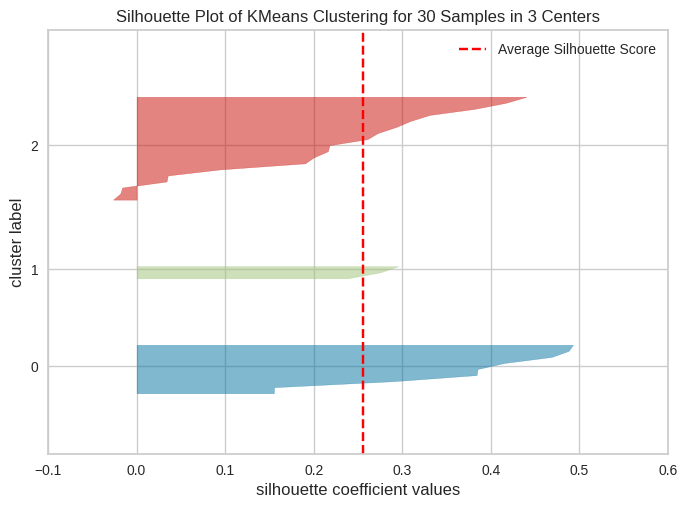

실루엣 계수= 0.2557


In [63]:
clus=KMeans(3)
graph_sil=SilhouetteVisualizer(clus, colors="yellowbrick")
graph_sil.fit(df_raw_x)
graph_sil.show()
print("실루엣 계수=",format(round(graph_sil.silhouette_score_,4)))

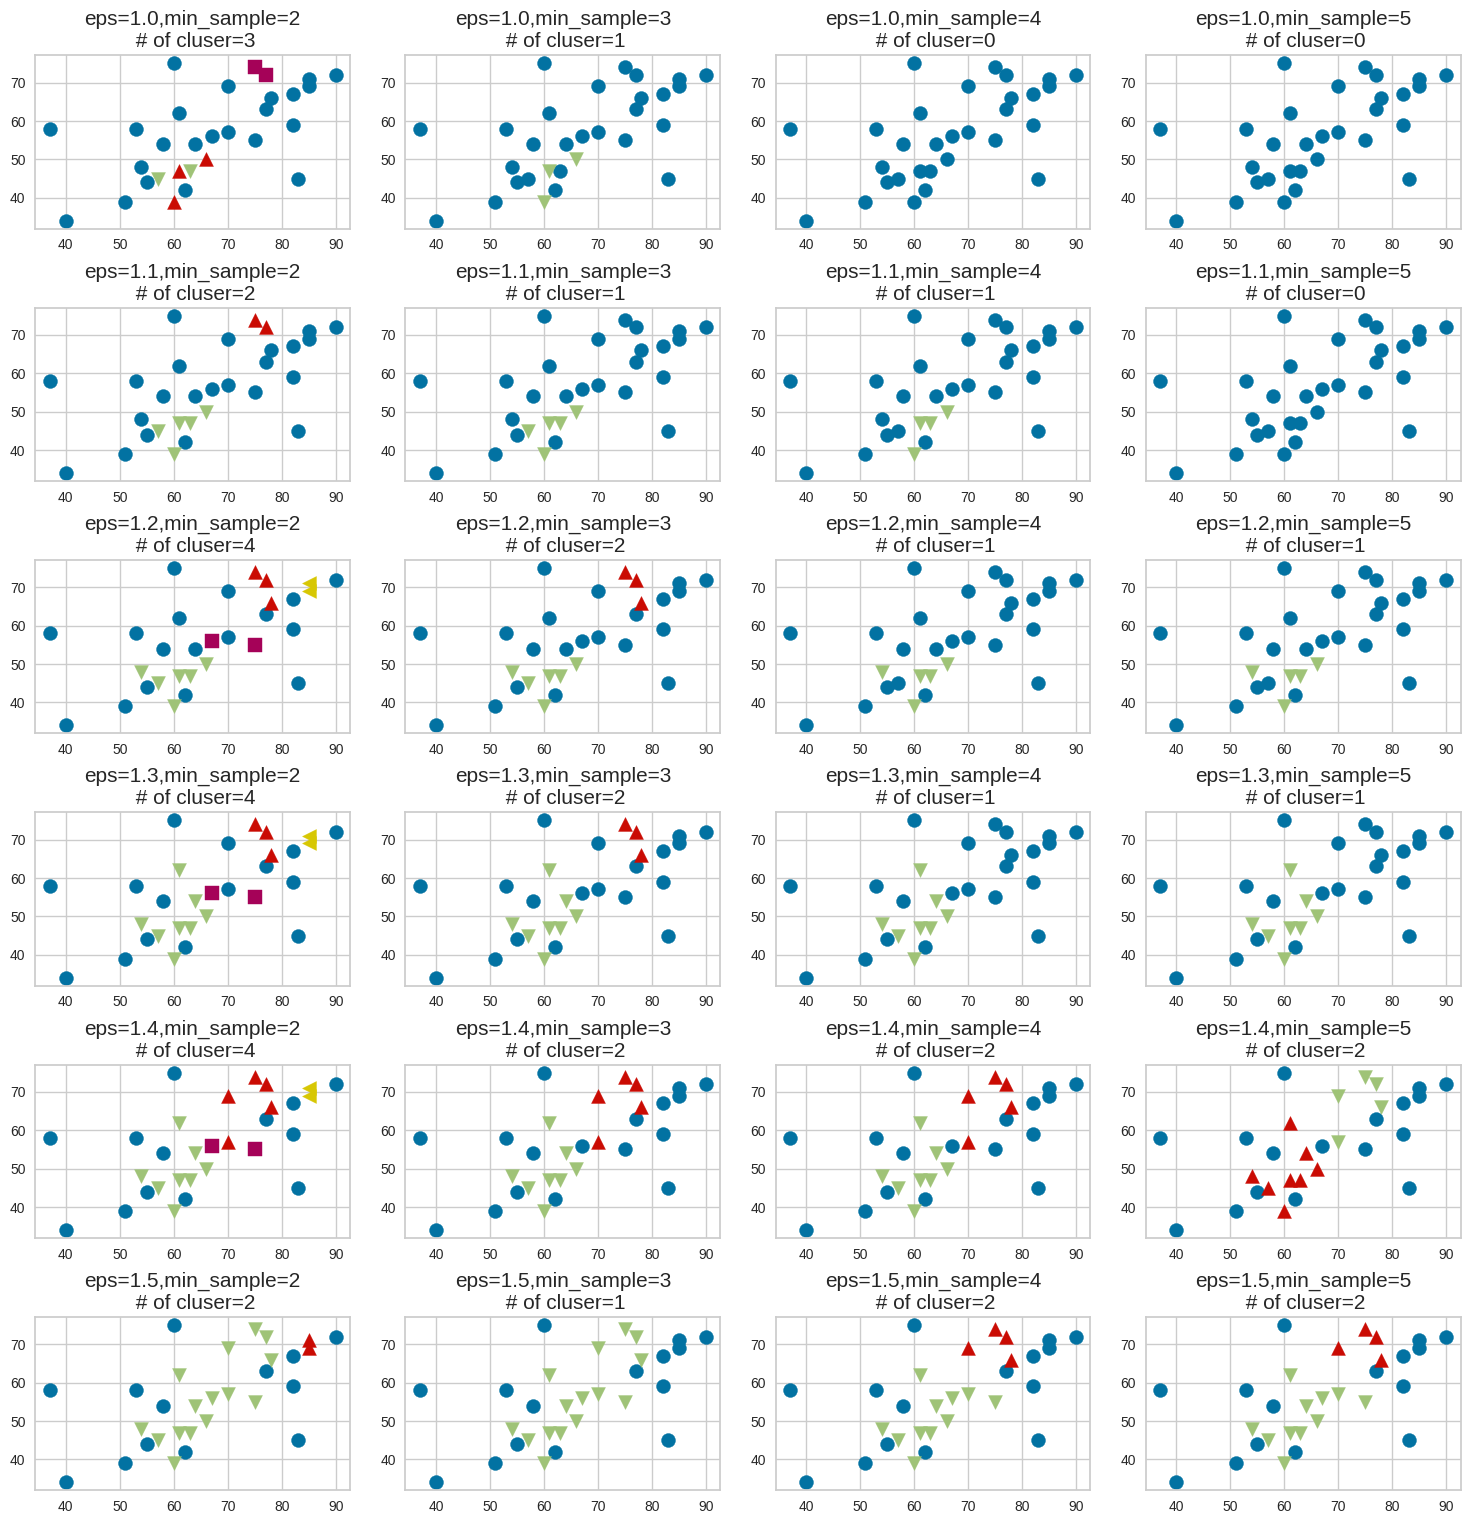

In [64]:
X=df_raw["DISSATIS"]
Y=df_raw["CHANCE"]

markers=["o","v","^","s","<",">","p","D"]
para_eps=[k/10 for k in range(10,16,1)]
para_min_sample=[2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize=(15,15))
fig.tight_layout(w_pad=1, h_pad=3)

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan=DBSCAN(min_samples=min_sample, eps=eps)
        clusters = dbscan.fit_predict(df_raw_x)
        clusters= clusters+1
        for (n_clus,clus) in enumerate(range(min(clusters),max(clusters)+1,1)):
            axes[i,j].scatter(X[clusters==clus], Y[clusters==clus], marker=markers[n_clus],s=100)
            axes[i,j].set_title("eps="+str(eps)+",min_sample="+str(min_sample)+"\n # of cluser="+str(max(clusters)), fontsize=15)

In [65]:
dbscan=DBSCAN(eps=1.4, min_samples=2).fit(df_raw_x)

cluster_DB= dbscan.labels_

for (i,val) in enumerate(cluster_DB):
    if val <0:
        cluster_DB[i]=0
    else:
        cluster_DB[i]=cluster_DB[i]+1
df_raw["cluster_DB"]= cluster_DB
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H,cluster_KM,cluster_DB
0,43,51,30,39,61,92,45,1,1,0
1,63,64,51,54,63,73,47,5,5,1
2,71,70,68,69,76,86,48,3,2,2
3,61,63,45,47,54,84,35,1,1,1
4,81,78,56,66,71,83,47,3,2,2


In [66]:
df_summary_DB= df_raw.drop(["cluster_H","cluster_H"], axis=1, inplace=False).groupby("cluster_DB").agg(["min","mean","max"])
level0= df_summary_DB.columns.get_level_values(0)
level1= df_summary_DB.columns.get_level_values(1)

df_summary_DB.columns= level0+"_"+level1
df_summary_DB.reset_index(inplace=True)
df_summary_DB.round(3)

,cluster_DB,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max,cluster_KM_min,cluster_KM_mean,cluster_KM_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,88,49,70.615,92,25,41.923,72,1,3.231,5
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,66,73,78.625,84,33,39.125,47,1,2.000,5
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,80,77,81.800,86,46,47.200,49,2,2.000,2
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,70,66,67.000,68,35,38.000,41,5,5.000,5
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,79,74,76.500,79,55,59.000,63,2,2.000,2
